In [1]:
# 用户画像分析

In [ ]:
# 1. 生成pkl数据

In [404]:
# %run import_member_data.py

In [ ]:
# 2. 分析过程

In [405]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine

In [176]:
# 2.1 导入pkl数据

In [406]:
data = pd.read_pickle('member.pkl')

In [407]:
data['last_invest_date_ts'] = pd.to_datetime(data['last_invest_date']).dt.date

In [408]:
data['last_receipt_time_ts'] = pd.to_datetime(data['last_receipt_time']).dt.date

In [409]:
data.head(2).T

,0,1
member_id,290,472
reg_time,2013-04-16 18:58:56,2013-05-20 15:48:08
reg_days,1876.88,1843.02
is_valid_idcard,True,True
is_admin,False,False
reg_way,None,None
is_recommended,0,0
recommender_id,NaN,NaN
is_inner,0,0
birthday,1983-06-30 00:00:00,1982-11-13 00:00:00


In [410]:
attr=['member_id']
attr+=['reg_time','reg_days','is_recommended','age','sex','last_invest_date','last_invest_days']
attr+=['invest_times','invest_capital','invest_month_2_capital','invest_month_3_capital','invest_month_6_capital','invest_month_12_capital']
attr+=['is_recommender','recommended_num','recommended_valid_num','recommended_invest_capital']
attr+=['first_invest_date','first_invest_capital','first_cycle_type','first_cycle']
attr+=['second_invest_date','second_invest_capital','second_cycle_type','second_cycle']
attr+=['third_invest_date','third_invest_capital','third_cycle_type','third_cycle']
attr+=['last_receipt_time','last_invest_date_ts','last_receipt_time_ts','to_receipt_days','unreceipt_capital']

In [339]:
# attr

In [411]:
df = data[attr].copy()

In [412]:
df.head(2).T

,0,1
member_id,290,472
reg_time,2013-04-16 18:58:56,2013-05-20 15:48:08
reg_days,1876.88,1843.02
is_recommended,0,0
age,34.9607,35.5881
sex,1,1
last_invest_date,2013-11-02 19:10:33,2014-09-30 15:32:15
last_invest_days,1676.87,1345.03
invest_times,1,5
invest_capital,100,1300


In [473]:
df[df.member_id==980723].T

,8827
member_id,980723
reg_time,2018-02-11 13:22:03
reg_days,115.117
is_recommended,1
age,39.2265
sex,1
last_invest_date,2018-05-18 09:20:06
last_invest_days,19.2845
invest_times,3
invest_capital,1500


In [ ]:
# 最后一次投资时间的用户分布

In [395]:
df[(df.recommended_num>=20) & (df.recommended_valid_num>=2)].shape

(320, 31)

In [398]:
a=df[(df.recommended_num>=20) & (df.recommended_valid_num>=2)][['member_id','recommended_num','recommended_valid_num']]

In [ ]:
a.to_csv(a.)

In [353]:
s_lastinvest =df['last_invest_date_ts'].groupby(df['last_invest_date_ts']).count()

In [354]:
s_lastinvest.head()

last_invest_date_ts
2013-07-18    10
2013-07-19     7
2013-07-20     3
2013-07-21     4
2013-07-23     1
Name: last_invest_date_ts, dtype: int64

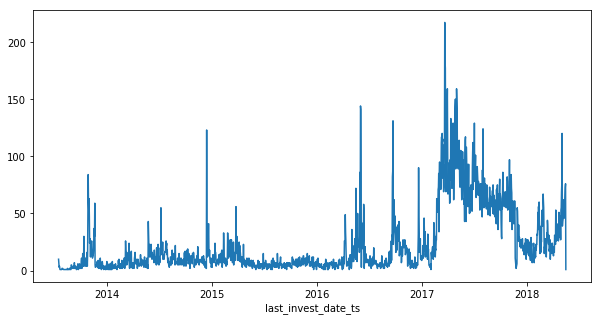

In [355]:
s_lastinvest.plot(figsize=(10,5))

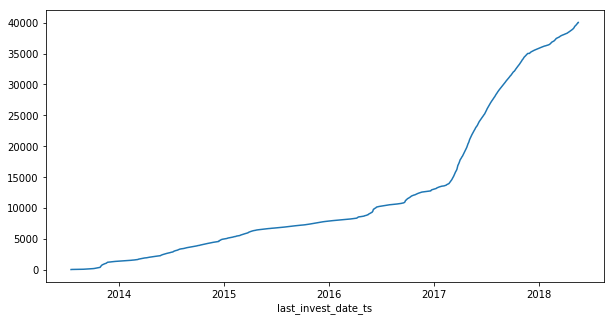

In [333]:
s_lastinvest.cumsum().plot(figsize=(10,5))

In [ ]:
# 最后一次还款时间的用户分布

In [356]:
s_last_receipt =df['last_receipt_time_ts'].groupby(df['last_receipt_time_ts']).count()

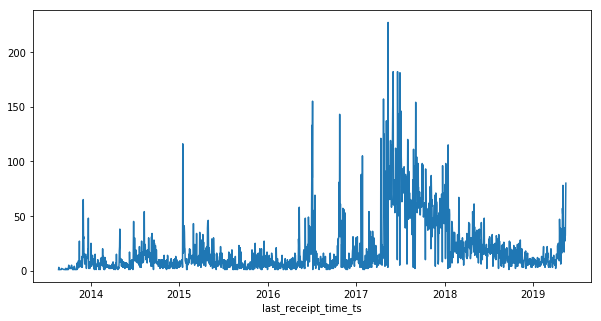

In [358]:
s_last_receipt.plot(figsize=(10,5))

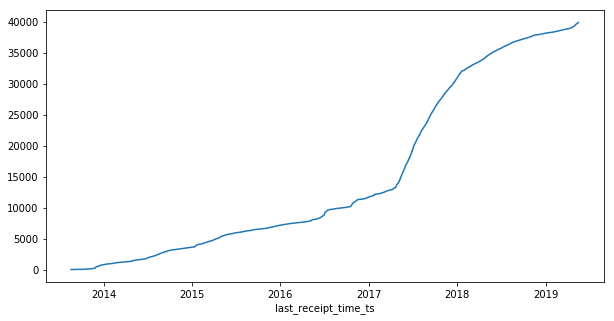

In [357]:
s_last_receipt.cumsum().plot(figsize=(10,5))

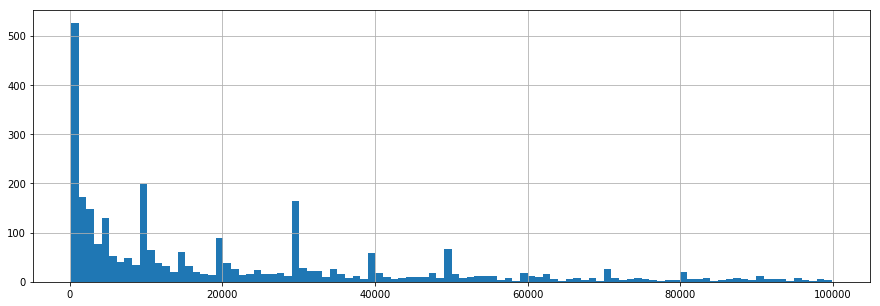

In [375]:
# 待还金额分布
df[(df.unreceipt_capital>100) & (df.unreceipt_capital<100000)].unreceipt_capital.hist(figsize=(15,5),bins=100)

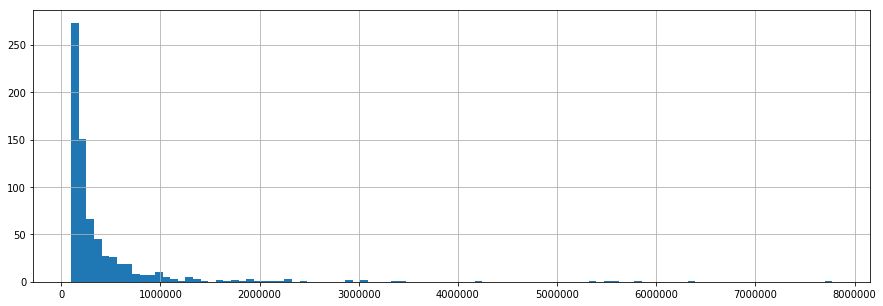

In [376]:
# 待还金额分布
df[(df.unreceipt_capital>100000)].unreceipt_capital.hist(figsize=(15,5),bins=100)

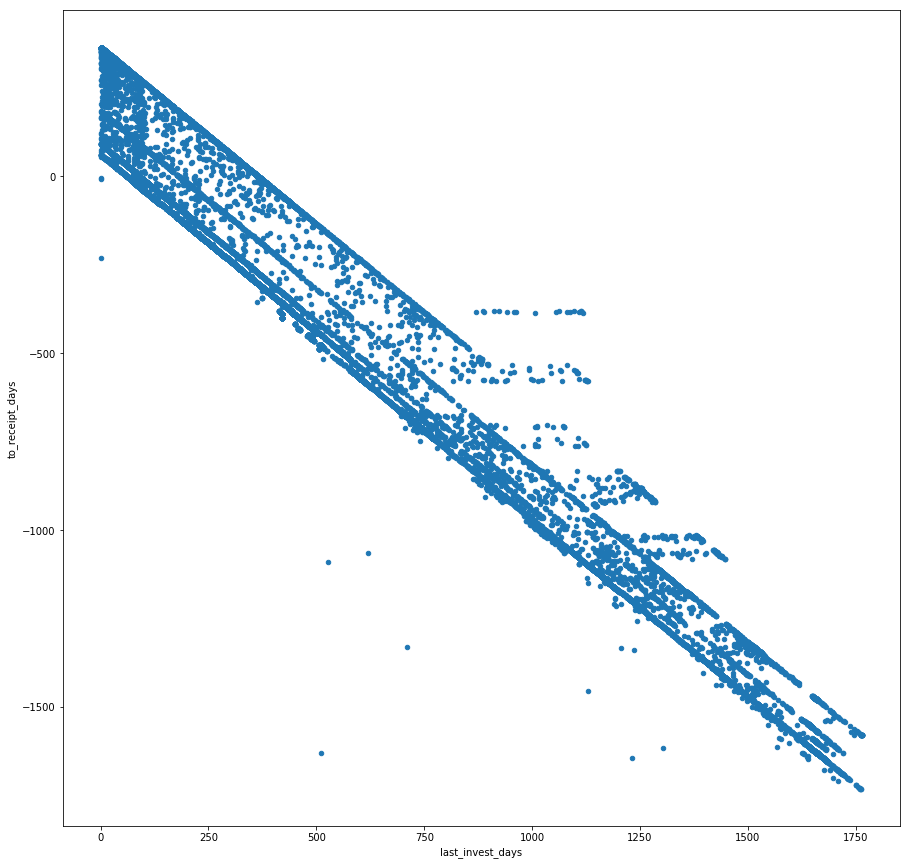

In [387]:
# 最后一次投标与最后一次还款的关系
df.plot.scatter(x='last_invest_days', y='to_receipt_days',figsize=(15, 15))

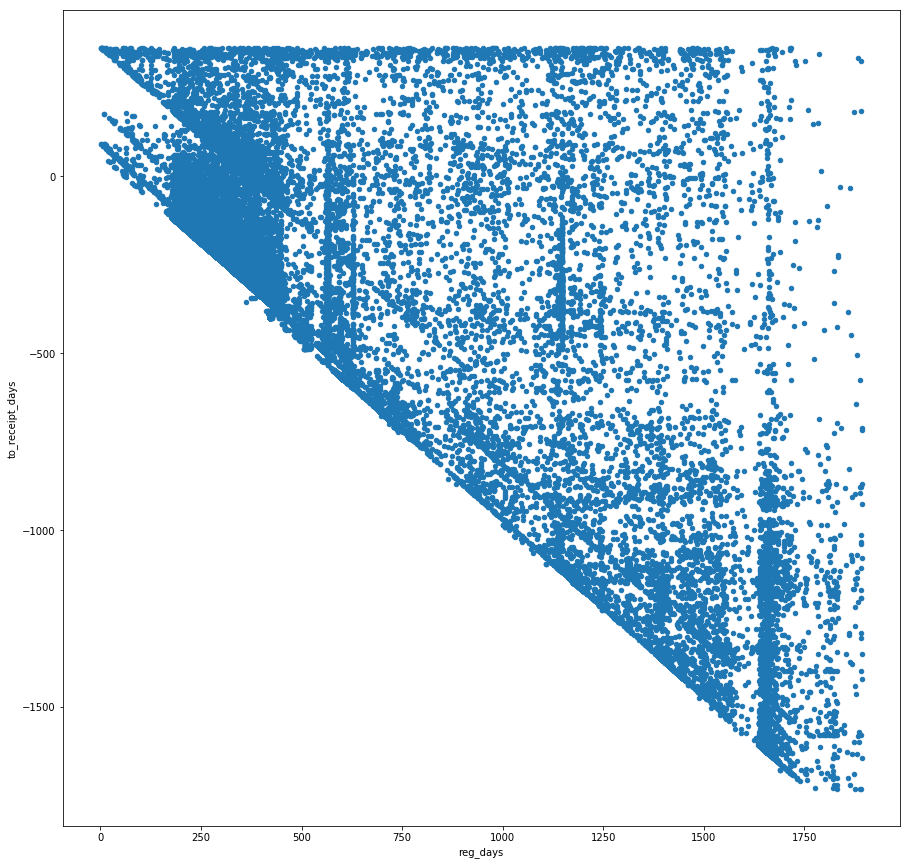

In [392]:
df.plot.scatter(x='reg_days', y='to_receipt_days',figsize=(15, 15))

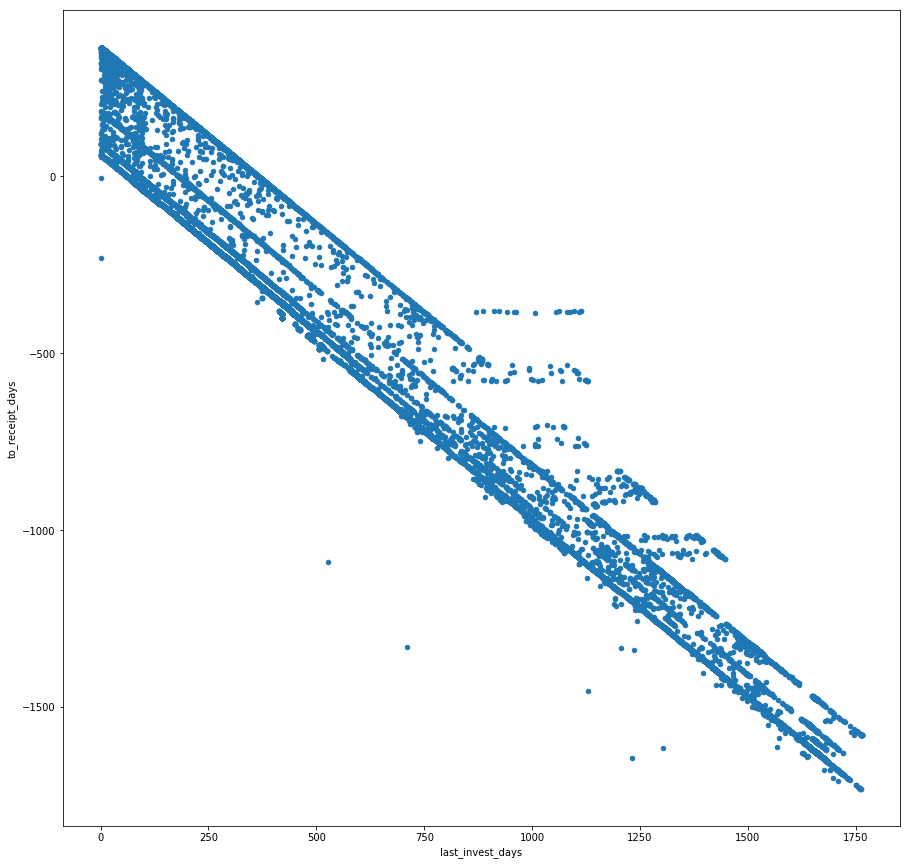

In [390]:
df[df.recommended_valid_num==0].plot.scatter(x='last_invest_days', y='to_receipt_days',figsize=(15, 15))

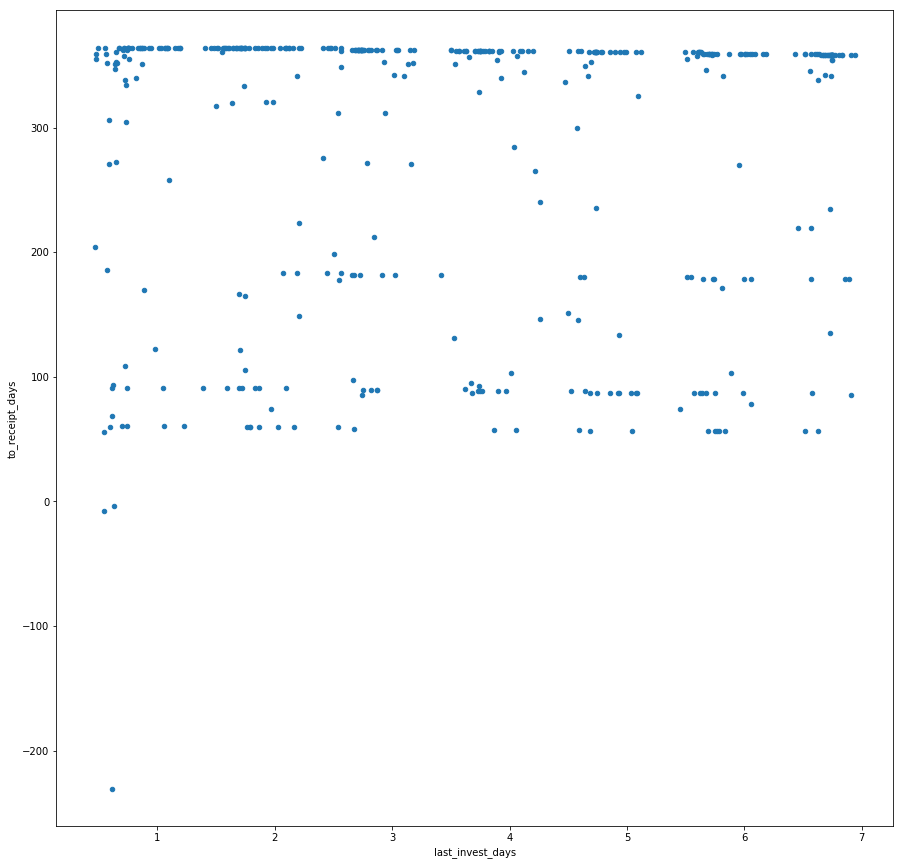

In [386]:
# 最后一次投标与最后一次还款的关系
df[df.last_invest_days<7].plot.scatter(x='last_invest_days', y='to_receipt_days',figsize=(15, 15))

In [377]:
df[(df.unreceipt_capital>100000)].shape

(706, 31)

In [344]:
df[df.last_invest_date>='2017-12-01'].shape

(4909, 31)

In [343]:
df[df.last_receipt_time>='2018-05-16'].shape

(5132, 31)

In [346]:
df[(df.last_invest_date>='2017-12-01') & (df.last_receipt_time>='2018-05-01') ].shape

(3792, 31)

In [284]:
df['lastinvest_date']=pd.to_datetime(df['last_invest_date']).dt.date

In [274]:
df2=df_last_invest.last_invest_date/df_last_invest.last_invest_date.sum()

In [11]:
# 2.2 计算字段

In [ ]:
# 用户类型(一次和多次用户)

In [445]:
f = lambda x: 1 if x==1 else 2

In [446]:
df['member_type']=df.invest_times.map(f)

In [447]:
# 注册时间和首次投资时间的间隔

In [448]:
first_span=pd.to_datetime(df['first_invest_date'])-pd.to_datetime(df['reg_time'])

In [449]:
df['first_span']=first_span.astype('timedelta64[D]')

In [450]:
# 第一次和第二次的投资间隔

In [451]:
span=pd.to_datetime(df['second_invest_date'])-pd.to_datetime(df['first_invest_date'])

In [452]:
df['second_span']=span.astype('timedelta64[D]')

In [471]:
df[(df.second_span==0) & (df.reg_time>'2018') & (df.first_invest_capital==100) & (df.second_invest_capital==100) & (df.invest_times==2)].head(20)

,member_id,reg_time,reg_days,is_recommended,age,sex,last_invest_date,last_invest_days,invest_times,invest_capital,...,third_cycle_type,third_cycle,last_receipt_time,last_invest_date_ts,last_receipt_time_ts,to_receipt_days,unreceipt_capital,member_type,first_span,second_span
632,988046,2018-03-18 17:40:29,79.937056,0,24.547051,0,2018-03-23 16:12:41,74.998029,2,200.0,...,NaN,NaN,2019-03-23 22:12:52,2018-03-23,2019-03-23,290.252099,200.0,2,4.0,0.0
1907,990548,2018-04-12 21:13:13,54.789325,1,21.936092,0,2018-04-12 21:27:11,54.779626,2,200.0,...,NaN,NaN,2018-07-13 16:13:22,2018-04-12,2018-07-13,37.002446,200.0,2,0.0,0.0
33197,990234,2018-04-09 10:37:52,58.230540,1,27.423763,0,2018-04-09 11:40:28,58.187068,2,200.0,...,NaN,NaN,2018-07-09 16:12:24,2018-04-09,2018-07-09,33.001775,200.0,2,0.0,0.0
35660,990267,2018-04-09 11:47:21,58.182288,1,34.725133,0,2018-04-11 07:59:18,56.340656,2,200.0,...,NaN,NaN,2018-07-11 20:12:18,2018-04-11,2018-07-11,35.168372,200.0,2,1.0,0.0
35661,990575,2018-04-13 09:52:01,54.262380,1,28.407325,0,2018-04-13 11:30:16,54.194151,2,200.0,...,NaN,NaN,2018-07-13 16:13:22,2018-04-13,2018-07-13,37.002446,200.0,2,0.0,0.0


In [472]:
df[df.member_id==990575].T

,35661
member_id,990575
reg_time,2018-04-13 09:52:01
reg_days,54.2624
is_recommended,1
age,28.4073
sex,0
last_invest_date,2018-04-13 11:30:16
last_invest_days,54.1942
invest_times,2
invest_capital,200


In [ ]:
# show

In [189]:
df.dtypes

member_id                       int64
reg_time                       object
reg_days                      float64
is_recommended                  int64
age                           float64
sex                             int64
last_invest_days              float64
invest_times                    int64
invest_capital                float64
invest_month_2_capital        float64
invest_month_3_capital        float64
invest_month_6_capital        float64
invest_month_12_capital       float64
is_recommender                  int64
recommended_num                 int64
recommended_valid_num           int64
recommended_invest_capital    float64
first_invest_date              object
first_invest_capital          float64
first_cycle_type                int64
first_cycle                     int64
second_invest_date             object
second_invest_capital         float64
second_cycle_type             float64
second_cycle                  float64
to_receipt_days               float64
unreceipt_ca

In [51]:
# df[df.member_id==12].T

In [ ]:
# 2.3 分析过程

In [ ]:
# 2.3.1 投标次数分析
# df.invest_times.hist(bins=50)

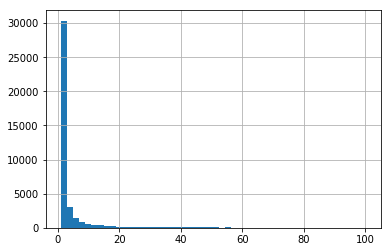

In [36]:
df[df.invest_times<=100]['invest_times'].hist(bins=50)

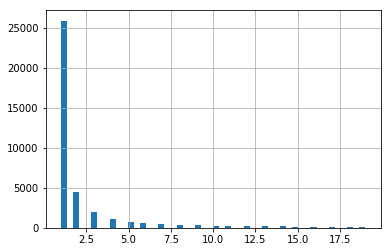

In [38]:
df[df.invest_times<20]['invest_times'].hist(bins=50)

### 分析
仅投一次的用户占比较大，从图形可以看出流失较高

In [56]:
#2.3.2 用户分类
df.groupby('member_type').size()

member_type
1    25905
2    14100
dtype: int64

In [57]:
# 投资客户是否为推荐人
df.groupby(['member_type','is_recommender']).size()

member_type  is_recommender
1            0                 20387
             1                  5518
2            0                  9976
             1                  4124
dtype: int64

In [58]:
# 投资客户是否为被推荐人
df.groupby(['member_type','is_recommended']).size()

member_type  is_recommended
1            0                  7154
             1                 18751
2            0                  6786
             1                  7314
dtype: int64

In [59]:
# 性别 
df.groupby(['member_type','sex']).size()

member_type  sex
1            0      10227
             1      15678
2            0       5342
             1       8758
dtype: int64

In [ ]:
# 活跃用户分析

In [200]:
df[df.member_id==980723].T

,16373
member_id,980723
reg_time,2018-02-11 13:22:03
reg_days,94.9088
is_recommended,1
age,39.1711
sex,1
last_invest_days,81.7076
invest_times,2
invest_capital,1100
invest_month_2_capital,100


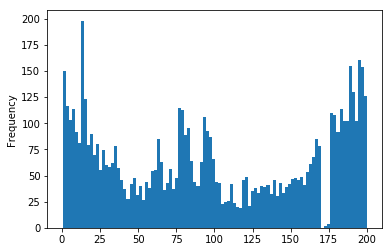

In [202]:
df[df.last_invest_days<200]['last_invest_days'].plot.hist(100)

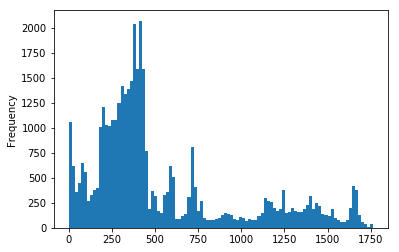

In [192]:
df['last_invest_days'].plot.hist(100)

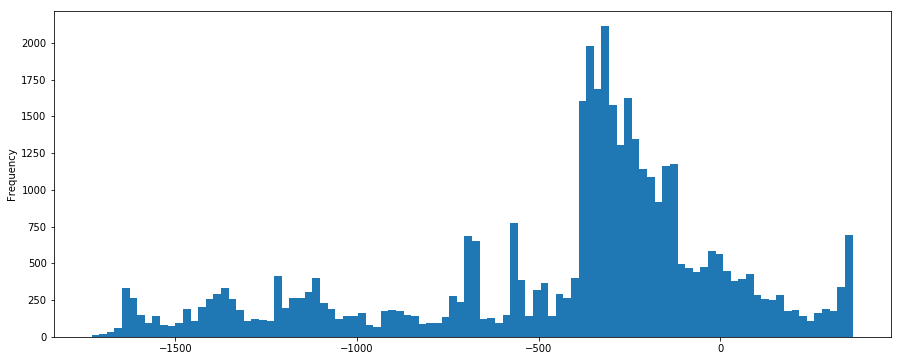

In [203]:
df['to_receipt_days'].plot.hist(figsize=(15, 6),bins=100)

In [ ]:
# 年龄

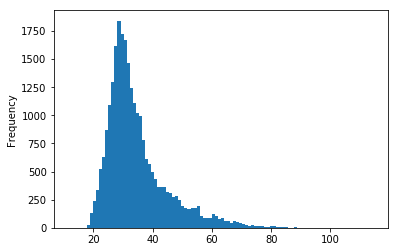

In [62]:
# 仅投资一次的用户年龄分布
df[(df.invest_times==1) & (df.age>10) ]['age'].plot.hist(100)

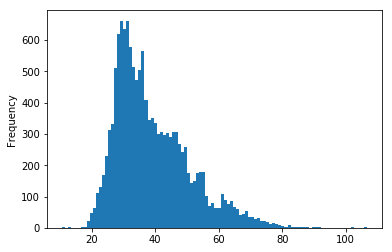

In [63]:
# 投资2次及以上的用户年龄分布
df[(df.invest_times>1) & (df.age>10) ]['age'].plot.hist(100)

#### 分析
年龄较大的用户复投率较高，可以对只投一次并且年龄>40的用户营销促进其二次投标

In [191]:
df.dtypes

member_id                       int64
reg_time                       object
reg_days                      float64
is_recommended                  int64
age                           float64
sex                             int64
last_invest_days              float64
invest_times                    int64
invest_capital                float64
invest_month_2_capital        float64
invest_month_3_capital        float64
invest_month_6_capital        float64
invest_month_12_capital       float64
is_recommender                  int64
recommended_num                 int64
recommended_valid_num           int64
recommended_invest_capital    float64
first_invest_date              object
first_invest_capital          float64
first_cycle_type                int64
first_cycle                     int64
second_invest_date             object
second_invest_capital         float64
second_cycle_type             float64
second_cycle                  float64
to_receipt_days               float64
unreceipt_ca

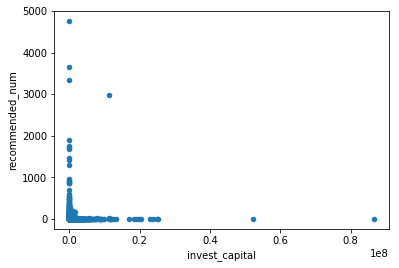

In [162]:
# 投资金额与推荐人数的关系
df.plot.scatter(x='invest_capital', y='recommended_num')

In [172]:
#df[(df.invest_capital>5000000) & (df.recommended_num>2000)].T

In [ ]:
# 投资金额与推荐人数的关系
df.plot.scatter(x='invest_capital', y='recommended_num')

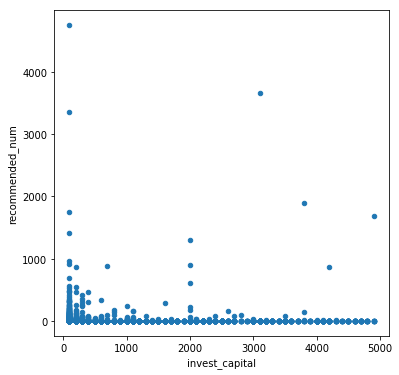

In [173]:
# 投资金额与推荐人数的关系
df[(df.invest_capital<5000) ].plot.scatter(x='invest_capital', y='recommended_num',figsize=(6, 6))

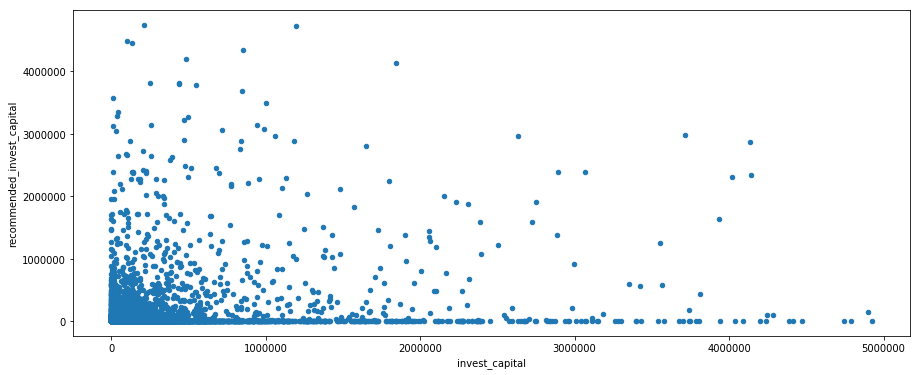

In [159]:

df[(df.invest_capital<5000000) & (df.recommended_invest_capital<5000000) ].plot.scatter(x='invest_capital', y='recommended_invest_capital',figsize=(15, 6))



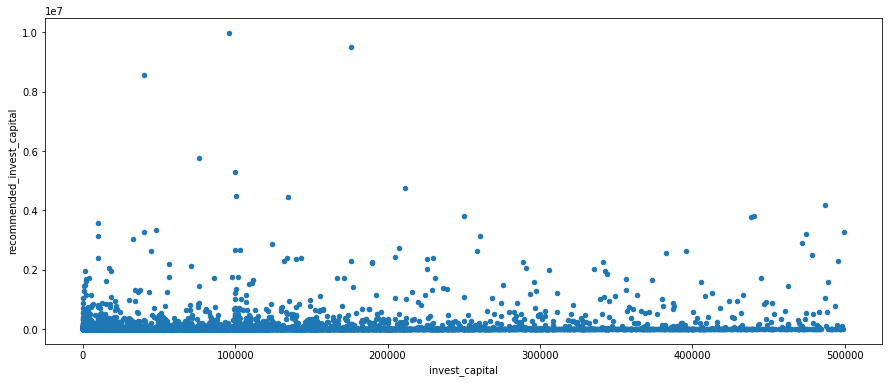

In [160]:
df[(df.invest_capital<500000) & (df.recommended_invest_capital<10000000) ].plot.scatter(x='invest_capital', y='recommended_invest_capital',figsize=(15, 6))

In [ ]:
# 投标次数与推荐人数的关系
df[(df.invest_times<200) & (df.recommended_num<20)].plot.scatter(x='invest_', y='recommended_valid_num')



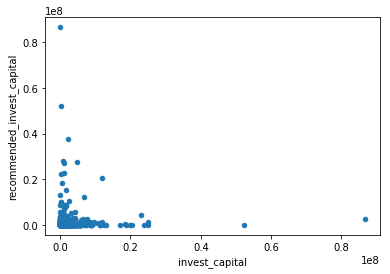

In [127]:
# 投资金额与被推荐用户的投资金额的散点图
df.plot.scatter(x='invest_capital', y='recommended_invest_capital')

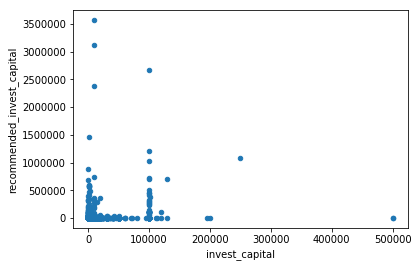

In [128]:
# (只投一次客户)投资金额与被推荐用户的投资金额的散点图
df[df.invest_times==1].plot.scatter(x='invest_capital', y='recommended_invest_capital')

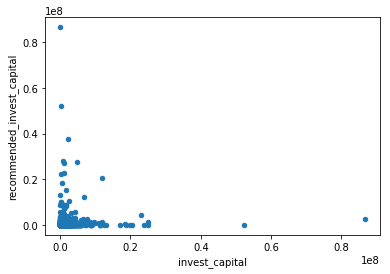

In [130]:
# (投2次及以上客户)投资金额与被推荐用户的投资金额的散点图
df[df.invest_times>1].plot.scatter(x='invest_capital', y='recommended_invest_capital')

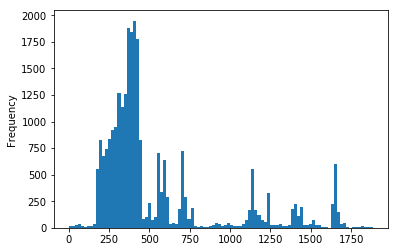

In [77]:
# 只投资一次的用户的注册日期距今的天数
df[(df.invest_times==1)]['reg_days'].plot.hist(100)

In [104]:
#df[(df.invest_times==1) & (df.reg_days<180)]['reg_days'].plot.hist(100)

### 分析
由于2017年注册量较大，因此相对来说只投一次的用户集中在2017年

In [ ]:
# 2.3.3 注册时间和首次投资时间的间隔

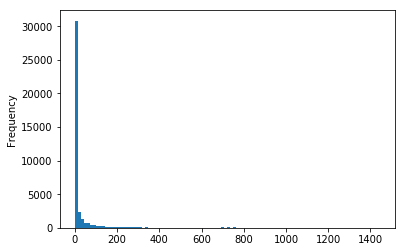

In [40]:
df.first_span.plot.hist(100)

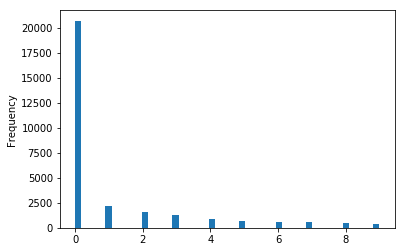

In [44]:
df[df.first_span<10].first_span.plot.hist(50)

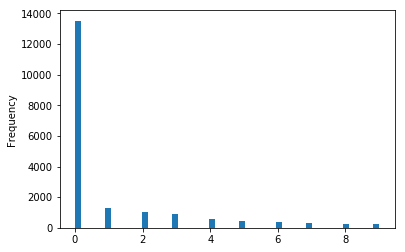

In [48]:
# 只投一次的首次投标与注册时间间隔
df[(df.member_type==1) & (df.first_span<10)].first_span.plot.hist(50)

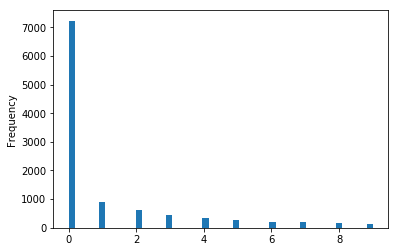

In [49]:
# 投二次以上的用户的首次投标时间与注册时间间隔
df[(df.member_type==2) & (df.first_span<10)].first_span.plot.hist(50)

### 分析
用户在注册当天就会投标，建议在一周内未投标的用户可以进行提醒，提高"注册->投标"的转化率

In [ ]:
# 2.3.4 第一次和第二次的投资间隔

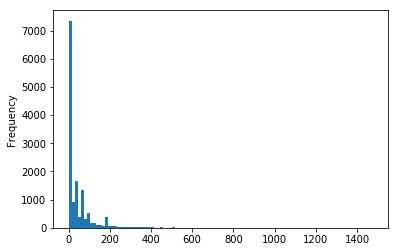

In [64]:
df.second_span.plot.hist(100)

In [444]:
df[df.second_span==0].head()

AttributeError: 'DataFrame' object has no attribute 'second_span'

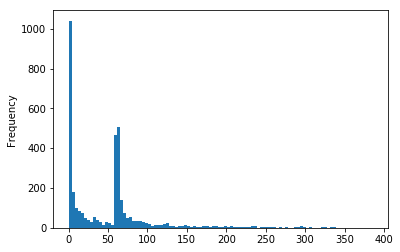

In [66]:
# 2月标的第二次投标时间与第一次投标的时间间隔
df[(df.member_type==2) & (df.first_cycle_type==2) & (df.first_cycle==2) & (df.second_span<400) ].second_span.plot.hist(100)

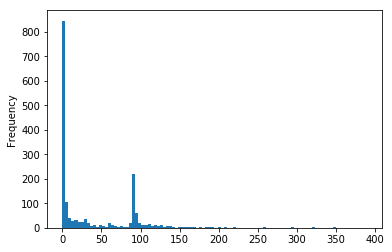

In [67]:
# 3月标的第二次投标时间与第一次投标的时间间隔
df[(df.member_type==2) & (df.first_cycle_type==2) & (df.first_cycle==3) & (df.second_span<400) ].second_span.plot.hist(100)

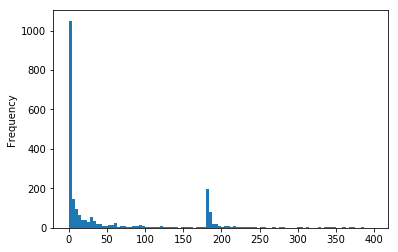

In [68]:
# 6月标的第二次投标时间与第一次投标的时间间隔
df[(df.member_type==2) & (df.first_cycle_type==2) & (df.first_cycle==6) & (df.second_span<400) ].second_span.plot.hist(100)

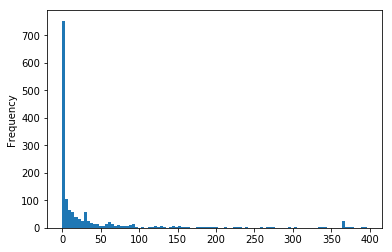

In [69]:
# 12月标的第二次投标时间与第一次投标的时间间隔
df[(df.member_type==2) & (df.first_cycle_type==2) & (df.first_cycle==12) & (df.second_span<400) ].second_span.plot.hist(100)

### 分析
用户第二次投标的时间集中在2个时间段,在这两个时间段可以分别进行营销
  + 第一个时间段集中在首次投标的几天内
  + 第二个时间段集中在首次标结束之后
另外12月时间较长，可以在用户投标之后就可以进行营销，用户到期之后的流失率较大

In [ ]:
# 首投金额分布

In [ ]:
# 首投2月标的金额分布

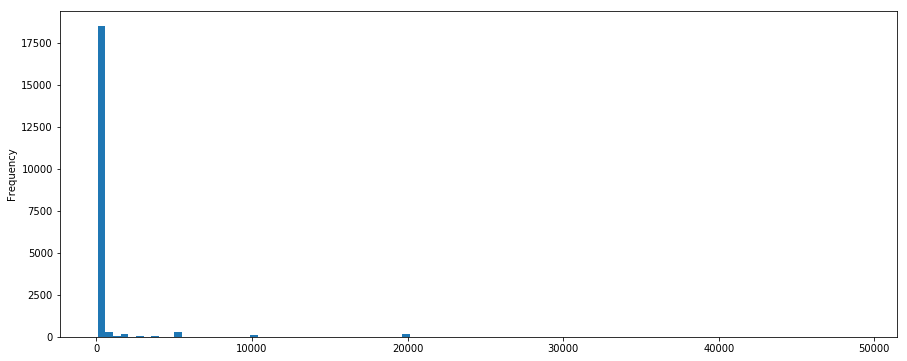

In [423]:
df[(df.first_cycle_type==2) & (df.first_cycle==2) & (df.first_invest_capital<50000)]['first_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

In [ ]:
# 首投6月标的金额分布

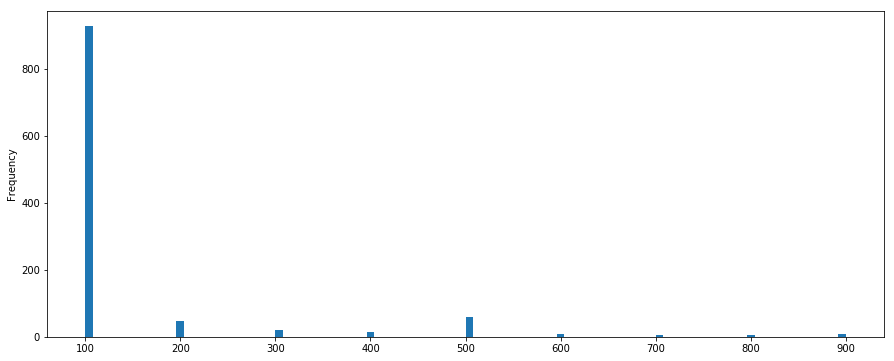

In [443]:
df[(df.first_cycle_type==2) & (df.first_cycle==6) & (df.first_invest_capital<1000)]['first_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

In [ ]:
# 首投12月标的金额分布

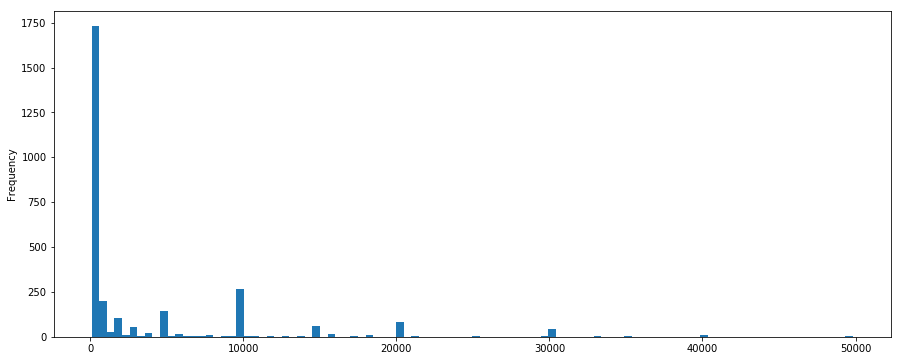

In [425]:
df[(df.first_cycle_type==2) & (df.first_cycle==12) & (df.first_invest_capital<50000)]['first_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

In [ ]:
# 首投18月标的金额分布

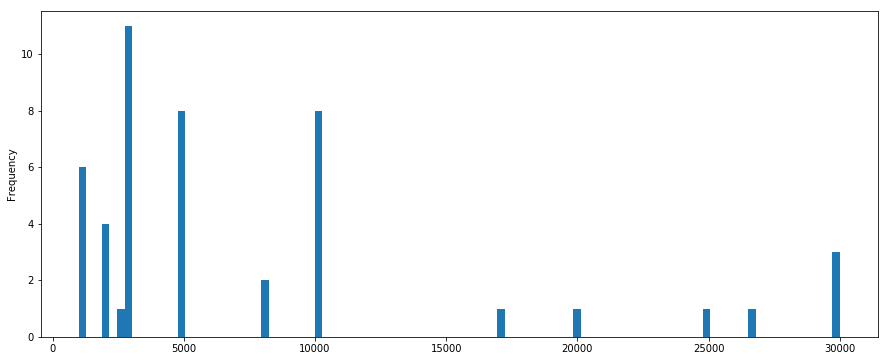

In [426]:
df[(df.first_cycle_type==2) & (df.first_cycle==18) & (df.first_invest_capital<50000)]['first_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

In [ ]:
# 第二次投2月标的金额分布

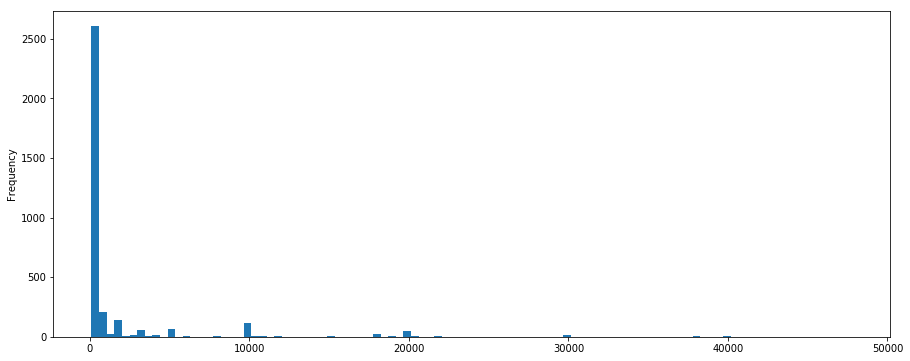

In [427]:
df[(df.second_cycle_type==2) & (df.second_cycle==2) & (df.second_invest_capital<50000)]['second_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

In [ ]:
# 第二次投6月标的金额分布

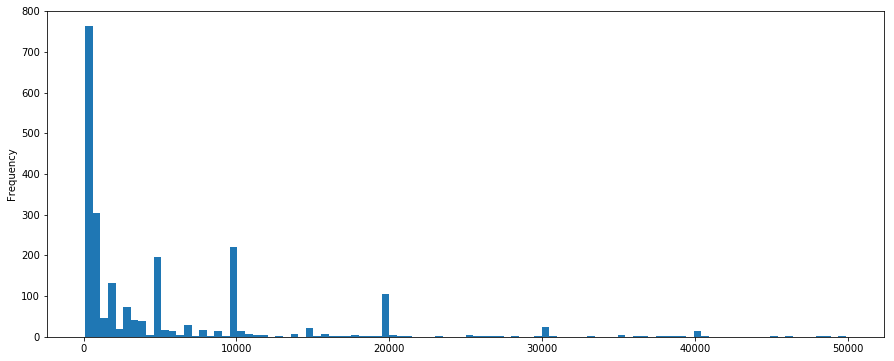

In [430]:
df[(df.second_cycle_type==2) & (df.second_cycle==6) & (df.second_invest_capital<50000)]['second_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

In [ ]:
# 第二次投12月标的金额分布

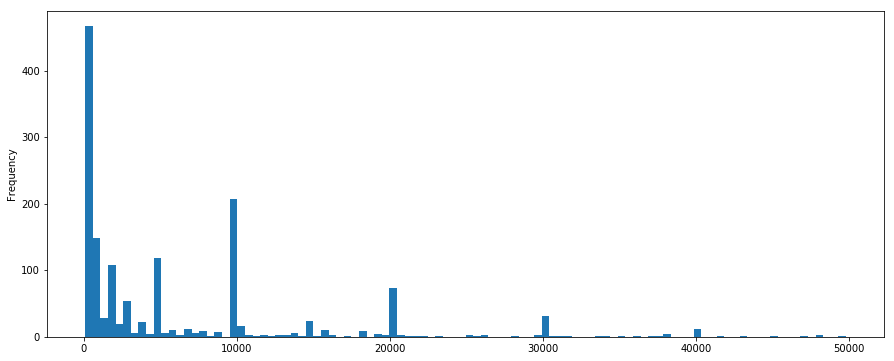

In [431]:
df[(df.second_cycle_type==2) & (df.second_cycle==12) & (df.second_invest_capital<50000)]['second_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

In [ ]:
# 第二次投18月标的金额分布

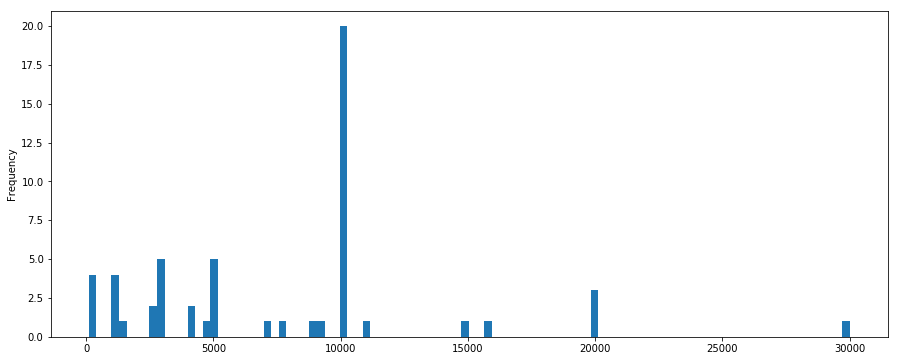

In [429]:
df[(df.second_cycle_type==2) & (df.second_cycle==18) & (df.second_invest_capital<50000)]['second_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

In [ ]:
# 第三次投2月标的金额分布

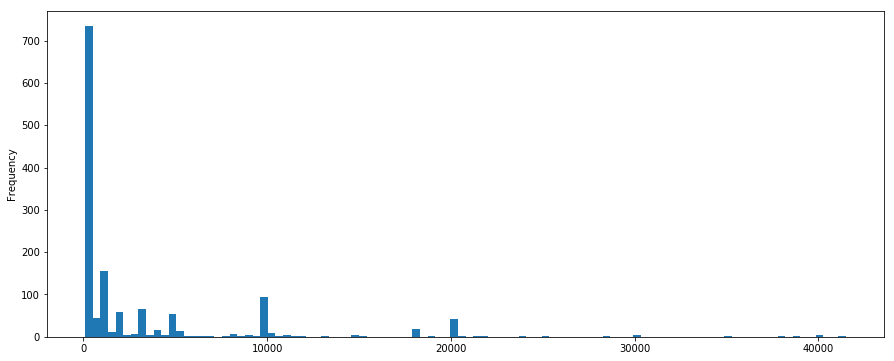

In [428]:
df[(df.third_cycle_type==2) & (df.third_cycle==2) & (df.third_invest_capital<50000)]['third_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

In [ ]:
# 第三次投6月标的金额分布

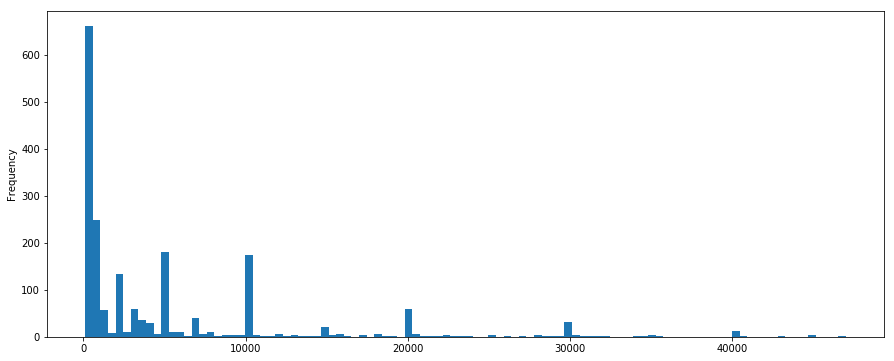

In [434]:
df[(df.third_cycle_type==2) & (df.third_cycle==6) & (df.third_invest_capital<50000)]['third_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

In [ ]:
# 第三次投12月标的金额分布

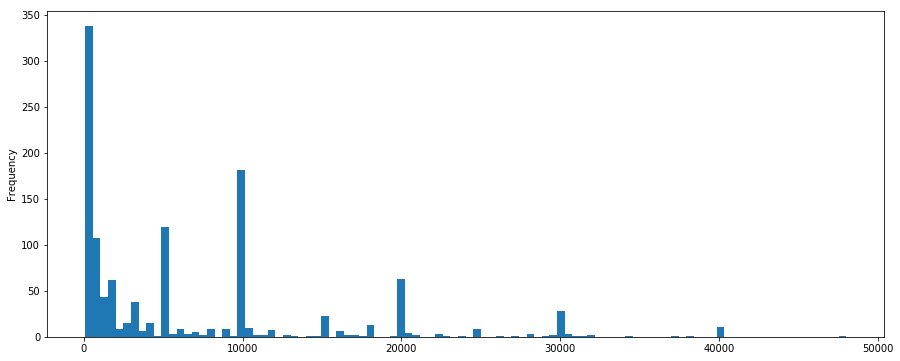

In [433]:
df[(df.third_cycle_type==2) & (df.third_cycle==12) & (df.third_invest_capital<50000)]['third_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

In [ ]:
# 第三次投18月标的金额分布

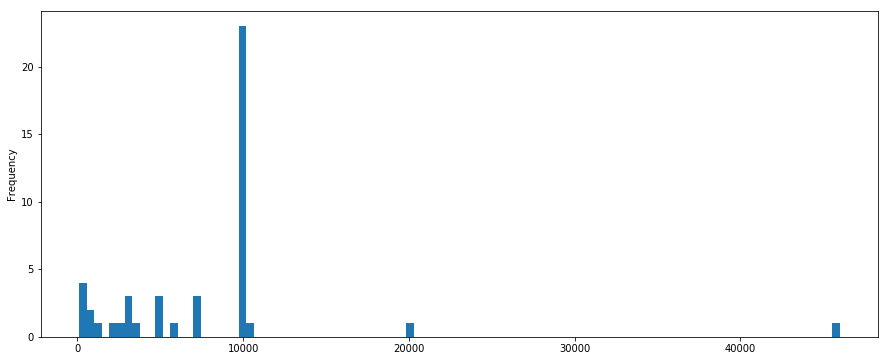

In [432]:
df[(df.third_cycle_type==2) & (df.third_cycle==18) & (df.third_invest_capital<50000)]['third_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

In [439]:
df[(df.third_cycle_type==2) & (df.third_cycle==2) & (df.third_invest_capital==100) & (df.reg_time>'2017')].head(10)

,member_id,reg_time,reg_days,is_recommended,age,sex,last_invest_date,last_invest_days,invest_times,invest_capital,...,second_cycle,third_invest_date,third_invest_capital,third_cycle_type,third_cycle,last_receipt_time,last_invest_date_ts,last_receipt_time_ts,to_receipt_days,unreceipt_capital
378,368048,2017-04-26 14:06:25,406.085714,1,32.516914,1,2017-08-16 18:34:40,293.899429,13,1300.0,...,2.0,2017-06-09 13:19:29,100.0,2.0,2.0,2018-04-26 20:32:02,2017-08-16,2018-04-26,-40.817924,0.0
400,387246,2017-05-04 19:25:28,397.864151,1,37.410064,1,2018-04-15 19:59:10,51.840748,6,600.0,...,2.0,2017-07-05 18:58:32,100.0,2.0,2.0,2018-06-15 21:32:09,2018-04-15,2018-06-15,9.223823,100.0
402,389931,2017-05-05 22:58:31,396.716200,1,34.421023,0,2018-03-12 17:25:44,85.947299,5,500.0,...,2.0,2017-10-15 22:27:41,100.0,2.0,2.0,2018-05-13 20:12:18,2018-03-12,2018-05-13,-23.831628,0.0
423,406962,2017-05-15 12:31:09,387.151871,1,21.273078,1,2017-09-17 21:06:32,261.793966,3,300.0,...,2.0,2017-09-17 21:06:32,100.0,2.0,2.0,2017-11-18 20:52:02,2017-09-17,2017-11-18,-199.804035,0.0
452,442002,2017-06-05 18:43:29,365.893306,1,30.870453,1,2017-08-10 07:24:06,300.365100,5,600.0,...,2.0,2017-06-09 07:32:24,100.0,2.0,2.0,2017-10-10 20:12:02,2017-08-10,2017-10-10,-238.831813,0.0
465,452741,2017-06-11 23:12:59,359.706154,0,28.218284,1,2018-02-06 23:32:07,119.692866,8,800.0,...,2.0,2017-08-18 00:01:39,100.0,2.0,2.0,2018-04-07 17:52:37,2018-02-06,2018-04-07,-59.928630,0.0
475,470880,2017-06-21 11:46:23,350.182959,1,35.415544,1,2017-09-02 18:31:56,276.901327,3,300.0,...,2.0,2017-09-02 18:31:56,100.0,2.0,2.0,2017-11-02 23:12:02,2017-09-02,2017-11-02,-215.706813,0.0
480,477844,2017-06-25 12:25:12,346.156003,1,30.640201,1,2017-08-30 14:23:19,280.073978,3,300.0,...,2.0,2017-08-30 14:23:19,100.0,2.0,2.0,2017-10-30 20:12:02,2017-08-30,2017-10-30,-218.831813,0.0
1073,418066,2017-05-23 08:08:22,379.334360,1,23.985407,0,2018-05-21 13:39:32,16.104383,5,500.0,...,2.0,2017-10-17 18:52:55,100.0,2.0,2.0,2018-08-22 20:12:32,2018-05-21,2018-08-22,77.168534,100.0
1081,427809,2017-05-28 17:53:36,373.927947,1,30.941685,0,2017-09-17 20:51:36,261.804336,4,400.0,...,2.0,2017-07-29 10:34:56,100.0,2.0,2.0,2017-11-18 20:52:02,2017-09-17,2017-11-18,-199.804035,0.0


In [442]:
df[df.member_id==442002].T

,452
member_id,442002
reg_time,2017-06-05 18:43:29
reg_days,365.893
is_recommended,1
age,30.8705
sex,1
last_invest_date,2017-08-10 07:24:06
last_invest_days,300.365
invest_times,5
invest_capital,600


In [104]:
# 首投金额分析

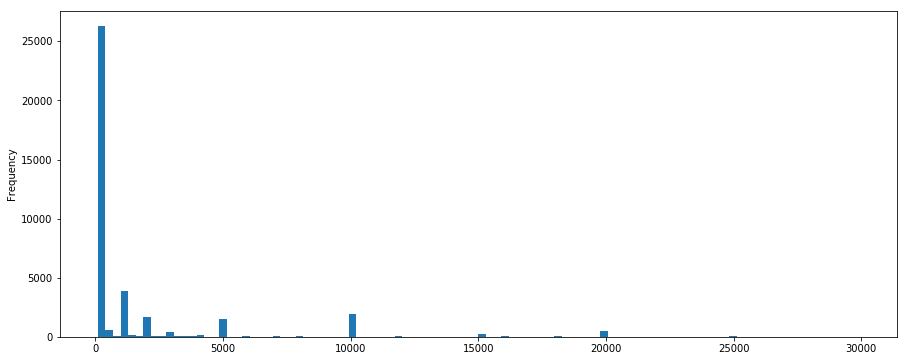

In [414]:
df[df.first_invest_capital<30000]['first_invest_capital'].plot.hist(figsize=(15, 6),bins=100)

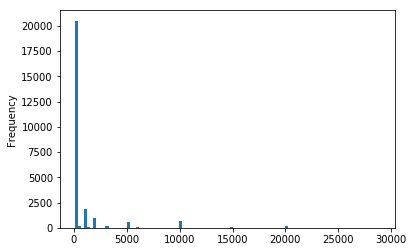

In [71]:
# 只投一次的用户首次投标金额
df[(df.invest_times==1) & (df.first_invest_capital<30000)]['first_invest_capital'].plot.hist(100)

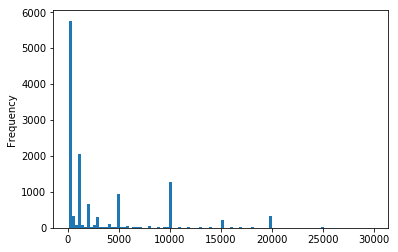

In [72]:
# 投2次以上的用户首次投标金额
df[(df.invest_times>1) & (df.first_invest_capital<30000)]['first_invest_capital'].plot.hist(100)

### 分析
只投一次的用户的首次投标金额主要投资在100元，可以针对投资100以上的用户进行营销

In [ ]:
# 月标类型
# df[(df.first_cycle_type==2)].groupby(['member_type','first_cycle']).size()

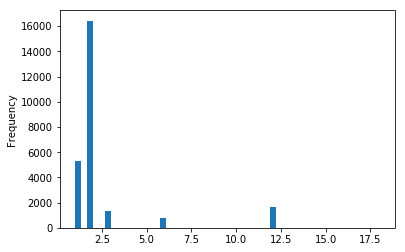

In [93]:
# 仅投一次标的用户的投的标月
df[(df.invest_times==1) & (df.first_cycle_type==2)]['first_cycle'].plot.hist(50)

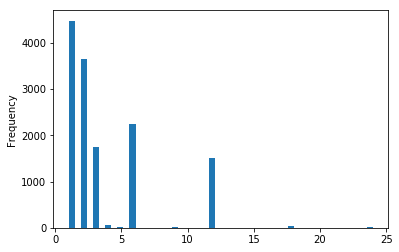

In [94]:
# 投2次标及以上的用户的首次投的标月
df[(df.invest_times>1) & (df.first_cycle_type==2)]['first_cycle'].plot.hist(50)

### 只投一次的用户的首次投标集中在2月标，而投2次以上的标在3,6,12月的标相对要多。


In [ ]:
# 标+100金额

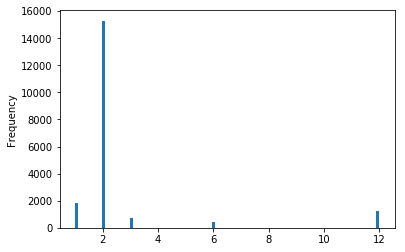

In [87]:
# 仅投一次标的首次投资金额=100的标月
df[(df.invest_times==1) & (df.first_cycle_type==2)& (df.first_invest_capital==100)]['first_cycle'].plot.hist(100)

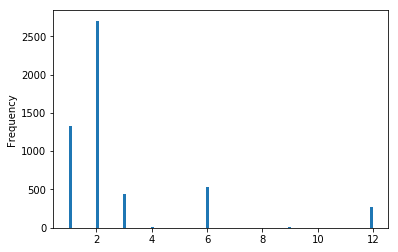

In [88]:
# 投2次及以上标的首次投资金额=100的标月
df[(df.invest_times>1) & (df.first_cycle_type==2)& (df.first_invest_capital==100)]['first_cycle'].plot.hist(100)

In [103]:
# 只投一次标的用户中，首次投标为2月标，且 投标金额为100的用户占只投一次标的用户的比例
df[(df.invest_times==1) & (df.first_cycle_type==2) & (df.first_cycle==2) & (df.first_invest_capital==100)].shape[0]/df[df.invest_times==1].shape[0]

0.5902721482339317

### 分析
只投一次标的用户中，首次投标为2月标，且投标金额为100的用户占只投一次标的用户的比例为59%。
可能这部分用户是试水用户或者活动用户。

In [120]:
import matplotlib  
matplotlib.matplotlib_fname()  

'/var/www/jupyter/venv/lib/python3.4/site-packages/matplotlib/mpl-data/matplotlibrc'

In [118]:
df[(df.invest_times==1) & (df.first_invest_capital==100)].shape[0]/df[df.invest_times==1].shape[0]

0.7661841343370006

In [119]:
df[(df.invest_times>1) & (df.first_invest_capital==100)].shape[0]/df[df.invest_times>1].shape[0]

0.3821985815602837

In [124]:
#coding=utf-8  

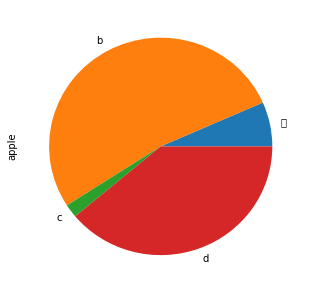

In [125]:
s = pd.Series(3 * np.random.rand(4), index=['中', 'b', 'c', 'd'], name='apple')
s.plot.pie(figsize=(5, 5))

In [204]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [205]:
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [206]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [212]:
ts.resample('2S').count()

2012-01-01 00:00:00    2
2012-01-01 00:00:02    2
2012-01-01 00:00:04    2
2012-01-01 00:00:06    2
2012-01-01 00:00:08    2
2012-01-01 00:00:10    2
2012-01-01 00:00:12    2
2012-01-01 00:00:14    2
2012-01-01 00:00:16    2
2012-01-01 00:00:18    2
2012-01-01 00:00:20    2
2012-01-01 00:00:22    2
2012-01-01 00:00:24    2
2012-01-01 00:00:26    2
2012-01-01 00:00:28    2
2012-01-01 00:00:30    2
2012-01-01 00:00:32    2
2012-01-01 00:00:34    2
2012-01-01 00:00:36    2
2012-01-01 00:00:38    2
2012-01-01 00:00:40    2
2012-01-01 00:00:42    2
2012-01-01 00:00:44    2
2012-01-01 00:00:46    2
2012-01-01 00:00:48    2
2012-01-01 00:00:50    2
2012-01-01 00:00:52    2
2012-01-01 00:00:54    2
2012-01-01 00:00:56    2
2012-01-01 00:00:58    2
2012-01-01 00:01:00    2
2012-01-01 00:01:02    2
2012-01-01 00:01:04    2
2012-01-01 00:01:06    2
2012-01-01 00:01:08    2
2012-01-01 00:01:10    2
2012-01-01 00:01:12    2
2012-01-01 00:01:14    2
2012-01-01 00:01:16    2
2012-01-01 00:01:18    2


In [401]:
53009/1525

34.76

In [402]:
1088430/9199

118.32046961626264

In [403]:
(1088970+53009)/(1525+9211)

106.36913189269747